In [1]:
from KGS import *
import h5py
import scipp as sc
import ipywidgets as ipw

In [2]:
def to_l(qx):
    c = 3.13
    c_star = 2 * np.pi / c
    return qx / c_star

def to_h(qy):
    a = 4.87
    a_star = 2 * np.pi / a
    return qy / a_star

graph = {'l': to_l}
graph2 = {'h': to_h}

# Chopper Settings Plots

## Load 4 ms data

with h5py.File('Magnon_v3_4ms.hdf5', 'r') as file:
    data_I = file['data/values'][:]
    variances_I = file['data/variances'][:]

    qx = file['coords/elem_000_qx/values'][:]
    qy = file['coords/elem_001_qy/values'][:]
    deltaE = file['coords/elem_002_deltaE/values'][:]

print(np.shape(data_I))

qx_4ms = sc.array(dims=["qx"], values=qx, unit="Å^(-1)")
qy_4ms = sc.array(dims=["qy"], values=qy, unit="Å^(-1)")
deltaE_4ms = sc.array(dims=["deltaE"], values=deltaE, unit="meV")

sliced_4ms = sc.DataArray(
    data=sc.array(dims=['qx', 'qy', 'deltaE'], values=data_I, unit="arb. units", variances=variances_I),  #, variances=settings[1]
    coords={"qx": qx_4ms, "qy": qy_4ms, "deltaE":deltaE_4ms}
)

## Load 1 ms data

In [3]:
with h5py.File('Magnon_v3_1ms.hdf5', 'r') as file:
    data_I = file['data/values'][:]
    variances_I = file['data/variances'][:]

    qx = file['coords/elem_000_qx/values'][:]
    qy = file['coords/elem_001_qy/values'][:]
    deltaE = file['coords/elem_002_deltaE/values'][:]

print(np.shape(data_I))

qx_1ms = sc.array(dims=["qx"], values=qx, unit="Å^(-1)")
qy_1ms = sc.array(dims=["qy"], values=qy, unit="Å^(-1)")
deltaE_1ms = sc.array(dims=["deltaE"], values=deltaE, unit="meV")

sliced_1ms = sc.DataArray(
    data=sc.array(dims=['qx', 'qy', 'deltaE'], values=data_I, unit="arb. units", variances=variances_I),  #, variances=settings[1]
    coords={"qx": qx_1ms, "qy": qy_1ms, "deltaE":deltaE_1ms}
)

transformed_1ms = sliced_1ms.transform_coords(['l'], graph=graph)
sliced_1ms = transformed_1ms.transform_coords(['h'], graph=graph2)

(112, 87, 95)


## Load 0.3 ms data 

In [4]:
with h5py.File('Magnon_v3_0p3ms.hdf5', 'r') as file:
    data_I = file['data/values'][:]
    variances_I = file['data/variances'][:]

    qx = file['coords/elem_000_qx/values'][:]
    qy = file['coords/elem_001_qy/values'][:]
    deltaE = file['coords/elem_002_deltaE/values'][:]

print(np.shape(data_I))

qx_0p3ms = sc.array(dims=["qx"], values=qx, unit="Å^(-1)")
qy_0p3ms = sc.array(dims=["qy"], values=qy, unit="Å^(-1)")
deltaE_0p3ms = sc.array(dims=["deltaE"], values=deltaE, unit="meV")

sliced_0p3ms = sc.DataArray(
    data=sc.array(dims=['qx', 'qy', 'deltaE'], values=data_I, unit="arb. units", variances=variances_I),  #, variances=settings[1]
    coords={"qx": qx_0p3ms, "qy": qy_0p3ms, "deltaE":deltaE_0p3ms}
)


transformed_0p3ms = sliced_0p3ms.transform_coords(['l'], graph=graph)
sliced_0p3ms = transformed_0p3ms.transform_coords(['h'], graph=graph2)

(112, 87, 95)


## Slice and dice

## 1 ms

In [ ]:
l_min = 0 * sc.Unit('Å^(-1)')
l_max = 2 * sc.Unit('Å^(-1)')

h_min = -2 * sc.Unit('Å^(-1)')
h_max = 4.0 * sc.Unit('Å^(-1)')


def update_plot(amp):
    E_layer = amp * sc.Unit('meV')
    plt.figure(figsize=(6,4))
    p1 = sliced_1ms['deltaE', E_layer]['h', h_min:h_max].transpose()#.plot(cmap='jet')
    im = plt.pcolormesh(p1.coords['l'].values, p1.coords['h'].values, p1.values, cmap='jet',  vmin=0, vmax=3) # vmin=0, vmax=3e-5
    cbar = plt.colorbar(im)
    cbar.set_label('I [a.u.]')
    plt.xlim(-1,2)
    plt.ylim(0,2.5)
    plt.xlabel('$l$ [r.l.u]')
    plt.ylabel('$h$ [r.l.u]')
    plt.title(f"$\Delta E =$ {amp:.2f} meV")
    #plt.savefig('Pb_phonon_BIFROST_qxqy_mid.pdf', format='pdf', bbox_inches='tight')
    

w = ipw.FloatSlider( 
    value=6.19,
    min=min(sliced_1ms.coords['deltaE'].values),
    max=max(sliced_1ms.coords['deltaE'].values),
    step=(sliced_1ms.coords['deltaE'].values[1]-sliced_1ms.coords['deltaE'].values[0]),
    description="Delta_E:",
    disabled=False,
    continuous_update=True,
    orientation="horizontal",
    readout=True,
    readout_format=".2f",
)
# Display the slider

ipw.interactive(update_plot, amp=w)

interactive(children=(FloatSlider(value=6.19, description='Delta_E:', max=8.991145000000001, min=-0.499966, st…

In [ ]:
E_min = -0.05 * sc.Unit('meV')
E_max = 7.0 * sc.Unit('meV')


def update_plot_qyE(amp):
    h_layer = amp * sc.Unit('Å^(-1)')
    plt.figure(figsize=(6,4))
    p1_1ms = sliced_1ms['h', h_layer]['deltaE', E_min:E_max].transpose()#.plot(cmap='jet')
    im = plt.pcolormesh(p1_1ms.coords['l'].values, p1_1ms.coords['deltaE'].values, p1_1ms.values, cmap='jet', vmin=0, vmax=2)
    cbar = plt.colorbar(im)
    cbar.set_label('I [a.u.]')
    plt.xlim(-1,2)
    plt.ylim(0,7)
    plt.xlabel('$l$ [r.l.u]')
    plt.ylabel('$\Delta E$ [meV]')
    plt.title(f"$h =$ {amp:.2f} [r.l.u]")
    #plt.savefig('Pb_phonon_BIFROST_hk.pdf', format='pdf', bbox_inches='tight')
    

w_qyE = ipw.FloatSlider( 
    value=1,
    min=min(sliced_1ms.coords['h'].values),
    max=max(sliced_1ms.coords['h'].values),
    step=(sliced_1ms.coords['h'].values[1]-sliced_1ms.coords['h'].values[0]),
    description="k:",
    disabled=False,
    continuous_update=True,
    orientation="horizontal",
    readout=True,
    readout_format=".2f",
)
# Display the slider


ipw.interactive(update_plot_qyE, amp=w_qyE)




interactive(children=(FloatSlider(value=1.0, description='k:', max=2.5631225234751303, min=-0.1210976634941148…

## 0.3 ms

In [ ]:
def update_plot(amp):
    E_layer = amp * sc.Unit('meV')
    plt.figure(figsize=(6,4))
    p1 = sliced_0p3ms['deltaE', E_layer]['h', h_min:h_max].transpose()#.plot(cmap='jet')
    im = plt.pcolormesh(p1.coords['l'].values, p1.coords['h'].values, p1.values, cmap='jet',  vmin=0, vmax=3) # vmin=0, vmax=3e-5
    cbar = plt.colorbar(im)
    cbar.set_label('I [a.u.]')
    plt.xlim(-1,2)
    plt.ylim(0,2.5)
    plt.xlabel('$l$ [r.l.u]')
    plt.ylabel('$h$ [r.l.u]')
    plt.title(f"$\Delta E =$ {amp:.2f} meV")
    #plt.savefig('Pb_phonon_BIFROST_qxqy_mid.pdf', format='pdf', bbox_inches='tight')
    

w = ipw.FloatSlider( 
    value=6.19,
    min=min(sliced_0p3ms.coords['deltaE'].values),
    max=max(sliced_0p3ms.coords['deltaE'].values),
    step=(sliced_0p3ms.coords['deltaE'].values[1]-sliced_0p3ms.coords['deltaE'].values[0]),
    description="Delta_E:",
    disabled=False,
    continuous_update=True,
    orientation="horizontal",
    readout=True,
    readout_format=".2f",
)
# Display the slider

ipw.interactive(update_plot, amp=w)

interactive(children=(FloatSlider(value=6.19, description='Delta_E:', max=8.991145000000001, min=-0.499966, st…

In [ ]:
def update_plot_qyE(amp):
    h_layer = amp * sc.Unit('Å^(-1)')
    plt.figure(figsize=(6,4))
    p1_0p3ms = sliced_0p3ms['h', h_layer]['deltaE', E_min:E_max].transpose()#.plot(cmap='jet')
    im = plt.pcolormesh(p1_0p3ms.coords['l'].values, p1_0p3ms.coords['deltaE'].values, p1_0p3ms.values, cmap='jet', vmin=0, vmax=2)
    cbar = plt.colorbar(im)
    cbar.set_label('I [a.u.]')
    plt.xlim(-1,2)
    plt.ylim(0,7)
    plt.xlabel('$l$ [r.l.u]')
    plt.ylabel('$\Delta E$ [meV]')
    plt.title(f"$h =$ {amp:.2f} [r.l.u]")
    #plt.savefig('Pb_phonon_BIFROST_hk.pdf', format='pdf', bbox_inches='tight')
    

w_qyE = ipw.FloatSlider( 
    value=1,
    min=min(sliced_0p3ms.coords['h'].values),
    max=max(sliced_0p3ms.coords['h'].values),
    step=(sliced_0p3ms.coords['h'].values[1]-sliced_0p3ms.coords['h'].values[0]),
    description="k:",
    disabled=False,
    continuous_update=True,
    orientation="horizontal",
    readout=True,
    readout_format=".2f",
)
# Display the slider


ipw.interactive(update_plot_qyE, amp=w_qyE)

interactive(children=(FloatSlider(value=1.0, description='k:', max=2.5631225234751303, min=-0.1210976634941148…

### **PSC = 1 ms** - Slicing along $Delta E$: You get $l$ and $h$ on the plot axis.

In [9]:
"""
2D Slice at a given DeltaE-value: returns a colorplot with l on the x-axis and h on the y-axis.  
"""
E_layer = 6.29 * sc.Unit('meV')

p1_Energy = sliced_1ms['deltaE', E_layer]['h', h_min:h_max].transpose()

h_size = sliced_1ms.coords['h'].values
print(h_size[1]-h_size[0])


0.03085310559734765


### **PSC = 1 ms** - Slicing along $h$: You get $l$ and $\Delta E$ on the plot axis.

In [10]:
"""
2D Slice at a given h-value: returns a colorplot with l on the x-axis.  
"""
E_min = -0.5 * sc.Unit('meV')
E_max = 8 * sc.Unit('meV')

h_layer = 1 * sc.Unit('Å^(-1)')

p1_1ms = sliced_1ms['h', h_layer]['deltaE', E_min:E_max].transpose()

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

l_slice = -0.25 * sc.Unit('Å^(-1)')

l_size = p1_1ms.coords['l'].values
print(l_size[1]-l_size[0])

p2_1ms = p1_1ms['deltaE', E_min:E_max]['l',l_slice]
E_1ms = p2_1ms.coords['deltaE'].values
E_1ms = (E_1ms[:-1] + E_1ms[1:]) / 2.0


#### Plotting of the cut

guess_1ms_1 = {'A':1, 'mu': 6, 'sigma':0.5}

fit_1ms_1 = fit(E_1ms, p2_1ms.values, np.sqrt(p2_1ms.variances),gauss, guess_1ms_1)

print('FWHM =', fit_1ms_1.values['sigma']*2.35)

fit_1ms_1.hesse()

0.01990936390574316
FWHM = 0.3907412467097131


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.79                      │              Nfcn = 373              │
│ EDM = 7.22e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   0.92    │   0.07    │            │            │         │         │       │
│ 1 │ mu    │   4.899   │   0.012   │            │            │         │         │       │
│ 2 │ sigma │   0.166   │   0.007   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         A        mu     sigma │
├───────┼───────────────────────────────┤
│     A │   0.00558 -0.000131 -0.000248 │
│    mu │ -0.000131  0.000149  3.58e-05 │
│ sigma │ -0.000248  3.58e-05  4.31e-05 │
└───────┴───────────────────────────────┘

In [11]:
"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

l_slice2 = 0.5 * sc.Unit('Å^(-1)')

p2_1ms2 = p1_1ms['deltaE', E_min:E_max]['l',l_slice2]
E_1ms2 = p2_1ms2.coords['deltaE'].values
E_1ms2 = (E_1ms2[:-1] + E_1ms2[1:]) / 2.0

#### Plotting of the cut
guess_1ms_2 = {'A':1, 'mu': 7, 'sigma':0.6}

fit_1ms_2 = fit(E_1ms2, p2_1ms2.values, np.sqrt(p2_1ms2.variances),gauss, guess_1ms_2)
print('FWHM =', fit_1ms_2.values['sigma']*2.35)

fit_1ms_2.hesse()

FWHM = 0.1738609130789687


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.4437                     │              Nfcn = 596              │
│ EDM = 3.68e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   1.12    │   0.16    │            │            │         │         │       │
│ 1 │ mu    │   6.733   │   0.009   │            │            │         │         │       │
│ 2 │ sigma │   0.074   │   0.006   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         A        mu     sigma │
├───────┼───────────────────────────────┤
│     A │    0.0246  -0.00022 -0.000496 │
│    mu │  -0.00022  8.55e-05  2.48e-05 │
│ sigma │ -0.000496  2.48e-05  3.27e-05 │
└───────┴───────────────────────────────┘

In [12]:
"""
1D Slice at a given E-value: returns a colorplot with l on the x-axis.  
"""
l_min = -1 * sc.Unit('Å^(-1)')
l_max = 2 * sc.Unit('Å^(-1)')

E_slice = 2 * sc.Unit('meV')

p2_1ms_E = p1_1ms['deltaE',E_slice]['l', l_min:l_max]
E_1ms_E = p2_1ms_E.coords['l'].values
E_1ms_E = (E_1ms_E[:-1] + E_1ms_E[1:]) / 2.0


### **PSC = 0.3 ms** - Slicing along $Delta E$: You get $l$ and $h$ on the plot axis.

In [13]:
"""
2D Slice at a given DeltaE-value: returns a colorplot with l on the x-axis and h on the y-axis.  
"""
#E_layer = 6.29 * sc.Unit('meV')

p1_Energy_0p3 = sliced_0p3ms['deltaE', E_layer]['h', h_min:h_max].transpose()



### **PSC = 0.3 ms** - Slicing along $h$: You get $l$ and $\Delta E$ on the plot axis.

In [14]:
"""
2D Slice at a given h-value: returns a colorplot with l on the x-axis.  
"""
#E_min = -0.5 * sc.Unit('meV')
#E_max = 8 * sc.Unit('meV')

#h_layer = 1 * sc.Unit('Å^(-1)')

p1_0p3ms = sliced_0p3ms['h', h_layer]['deltaE', E_min:E_max].transpose()

"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

#l_slice = -0.25 * sc.Unit('Å^(-1)')

p2_0p3ms = p1_0p3ms['deltaE', E_min:E_max]['l',l_slice]
E_0p3ms = p2_0p3ms.coords['deltaE'].values
E_0p3ms = (E_0p3ms[:-1] + E_0p3ms[1:]) / 2.0

print(E_0p3ms[1]-E_0p3ms[0])

#### Plotting of the cut
guess_0p3ms_1 = {'A':0.3, 'mu': 5.5, 'sigma':0.5}

fit_0p3ms_1 = fit(E_0p3ms, p2_0p3ms.values, np.sqrt(p2_0p3ms.variances),gauss, guess_0p3ms_1)

print('FWHM =', fit_0p3ms_1.values['sigma']*2.35)

fit_0p3ms_1.hesse()



0.09990643157894741
FWHM = 0.31461747170320814


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 21.31                      │              Nfcn = 315              │
│ EDM = 7.52e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   0.324   │   0.024   │            │            │         │         │       │
│ 1 │ mu    │   4.896   │   0.009   │            │            │         │         │       │
│ 2 │ sigma │   0.134   │   0.004   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         A        mu     sigma │
├───────┼───────────────────────────────┤
│     A │  0.000598 -2.45e-05  -4.2e-05 │
│    mu │ -2.45e-05   8.8e-05  1.51e-05 │
│ sigma │  -4.2e-05  1.51e-05  1.64e-05 │
└───────┴───────────────────────────────┘

In [15]:
"""
1D Slice at a given l-value: returns a colorplot with l on the x-axis.  
"""

p2_0p3ms2 = p1_0p3ms['deltaE', E_min:E_max]['l',l_slice2]
E_0p3ms2 = p2_0p3ms2.coords['deltaE'].values
E_0p3ms2 = (E_0p3ms2[:-1] + E_0p3ms2[1:]) / 2.0

#### Plotting of the cut

guess_0p3ms_2 = {'A':1, 'mu': 4, 'sigma':0.5}

fit_0p3ms_2 = fit(E_0p3ms2, p2_0p3ms2.values, np.sqrt(p2_0p3ms2.variances),gauss, guess_0p3ms_2)
print('FWHM =', fit_0p3ms_2.values['sigma']*2.35)
fit_0p3ms_2.hesse()

FWHM = 0.1326570964356402


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.468e-05                  │              Nfcn = 391              │
│ EDM = 5.46e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   0.59    │   0.08    │            │            │         │         │       │
│ 1 │ mu    │   6.709   │   0.006   │            │            │         │         │       │
│ 2 │ sigma │   0.056   │   0.005   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         A        mu     sigma │
├───────┼───────────────────────────────┤
│     A │   0.00582 -2.41e-06 -0.000244 │
│    mu │ -2.41e-06  3.49e-05 -3.64e-06 │
│ sigma │ -0.000244 -3.64e-06  2.55e-05 │
└───────┴───────────────────────────────┘

In [16]:
########## Load analytic dispersion from Silas.

ana_dis = np.loadtxt('analytic_dispersion.txt').T
print(ana_dis)

[[-1.         -0.99899967 -0.99799933 ...  1.99799933  1.99899967
   2.        ]
 [ 1.06168922  1.06189329  1.06250525 ...  1.06250525  1.06189329
   1.06168922]]


# Collected plot

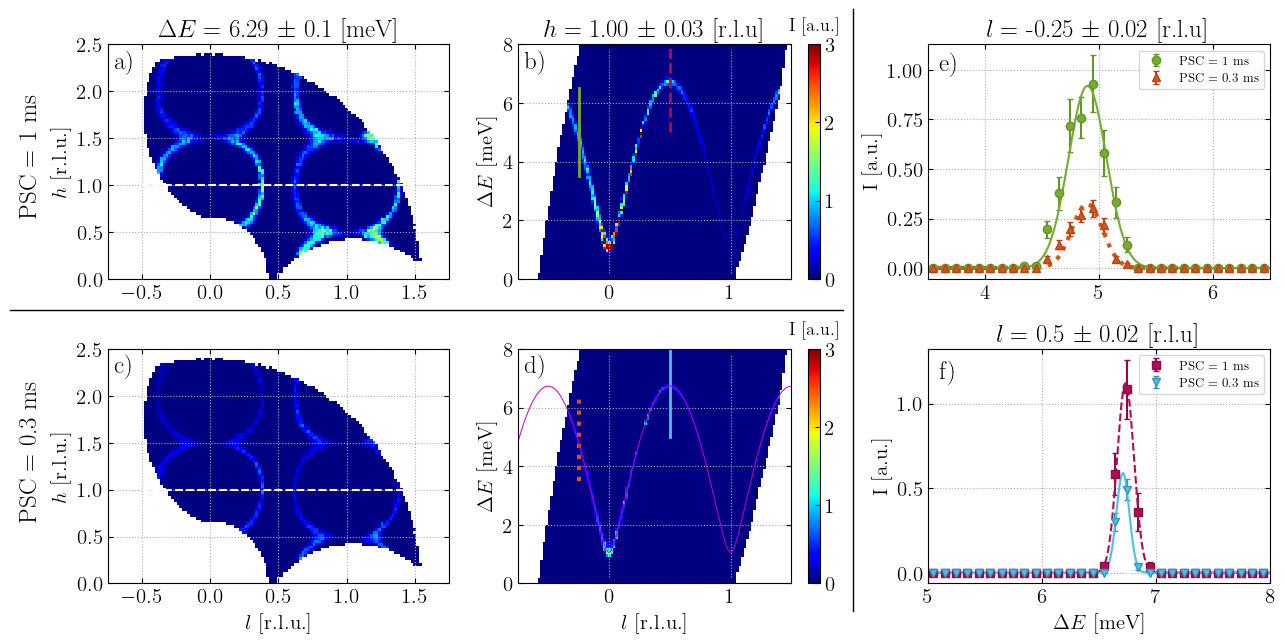

In [17]:
E_range = np.linspace(0,8,1000)

mpl.rcParams['font.size']        = 15 # standard er 45

fig, ax = plt.subplots(2,3,figsize=(15,7))
fig.subplots_adjust(wspace=0.2, hspace=0.3) 

"""
PSC = 1 ms
"""
ax[0,0].grid(linestyle='dotted')
im0 = ax[0,0].pcolormesh(p1_Energy.coords['l'].values, p1_Energy.coords['h'].values, p1_Energy.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
#cbar = plt.colorbar(im0)
#cbar.set_label('I [a.u.]')
ax[0,0].plot(np.linspace(-0.5,1.5,100), np.ones(100), '--', color='white')
ax[0,0].set_xlim(-0.75,1.75)
ax[0,0].set_ylim(0,2.5)
#ax[0,0].set_xlabel('$l$ [r.l.u.]')
ax[0,0].set_ylabel('$h$ [r.l.u.]')
ax[0,0].set_title(rf"$\Delta E =$ {E_layer.value:.2f} $\pm$ 0.1 [meV]")
ax[0,0].text(-0.7, 2.25, r'a)', weight='bold', color='black', fontsize=18)


ax[0,1].grid(linestyle='dotted')
im1 = ax[0,1].pcolormesh(p1_1ms.coords['l'].values, p1_1ms.coords['deltaE'].values, p1_1ms.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
cbar_1ms = plt.colorbar(im1)
cbar_1ms.ax.set_title('I [a.u.]', fontsize=13, pad=10)
ax[0,1].plot(np.ones(100)*l_slice.value, np.linspace(3.5,6.5,100), '-', color='#77AC30',lw=2)
ax[0,1].plot(np.ones(100)*l_slice2.value, np.linspace(5,8,100), '--', color='#B00B55',lw=2)  
ax[0,1].set_ylim(0,8)
ax[0,1].set_ylabel('$\Delta E$ [meV]')
ax[0,1].set_title(rf"$h =$ {h_layer.value:.2f} $\pm$ 0.03 [r.l.u]")
ax[0,1].text(-0.7, 7.2, r'b)', weight='bold', color='black', fontsize=18)
ax[0,1].set_xlim(-0.75,1.5)



ax[0,2].errorbar(E_1ms, p2_1ms.values, np.sqrt(p2_1ms.variances),  fmt='o', markerfacecolor='#77AC30',  ecolor='#669428', mew=1, markeredgecolor='#669428', label='PSC = 1 ms')
ax[0,2].plot(E_range, gauss(E_range, *fit_1ms_1.values), '-', color='#77AC30') 
#ax[0,2].text(4.05, 0.65, rf'FWHM = {fit_1ms_1.values[2]*2.35:.2f} meV', weight='bold', color="#4E8605", fontsize=11)

ax[0,2].set_ylabel("I [a.u.]")

ax[0,2].errorbar(E_1ms, p2_0p3ms.values, np.sqrt(p2_0p3ms.variances), fmt='^', color='#d95319', ecolor='#b54514', mew=1, markeredgecolor='#b54514', label='PSC = 0.3 ms')
ax[0,2].plot(E_range, gauss(E_range, *fit_0p3ms_1.values), linestyle='dotted', color='#d95319', lw=3)
#ax[0,2].text(5.75, 0.3, rf'FWHM = {fit_0p3ms_1.values[2]*2.35:.2f} meV', weight='bold', color='#d95319', fontsize=11)

ax[0,2].set_ylabel("I [a.u.]")
ax[0,2].set_xlim(3.5,6.5)
ax[0,2].grid(linestyle='dotted')
ax[0,2].legend(fontsize=9)
ax[0,2].text(3.6, 1.0, r'e)', weight='bold', color='black', fontsize=18)
ax[0,2].set_title(f'$l =$ -0.25 $\pm$ 0.02 [r.l.u]')


"""
PSC = 0.3 ms
"""

im2 = ax[1,0].pcolormesh(p1_Energy_0p3.coords['l'].values, p1_Energy_0p3.coords['h'].values, p1_Energy_0p3.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
ax[1,0].plot(np.linspace(-0.5,1.5,100), np.ones(100), '--', color='white')
ax[1,0].set_xlim(-0.75,1.75)
ax[1,0].set_ylim(0,2.5)
ax[1,0].set_xlabel('$l$ [r.l.u.]')
ax[1,0].set_ylabel('$h$ [r.l.u.]')
ax[1,0].text(-0.7, 2.25, r'c)', weight='bold', color='black', fontsize=18)
ax[1,0].grid(linestyle='dotted')

im3 = ax[1,1].pcolormesh(p1_0p3ms.coords['l'].values, p1_0p3ms.coords['deltaE'].values, p1_0p3ms.values, cmap='jet', vmin=0, vmax=3) # norm=colors.LogNorm()
cbar_0p3ms = plt.colorbar(im3)
cbar_0p3ms.ax.set_title('I [a.u.]', fontsize=13, pad=10)
ax[1,1].plot(np.ones(100)*l_slice.value, np.linspace(3.5,6.5,100),  linestyle='dotted', color='#d95319',lw=3) 
ax[1,1].plot(np.ones(100)*l_slice2.value, np.linspace(5,8,100), '-', color='#4dbeee',lw=2) 
ax[1,1].plot(ana_dis[0], ana_dis[1], '-', color='m', linewidth=0.7)

ax[1,1].set_xlim(-0.75,1.5)
ax[1,1].set_ylim(0,8)
ax[1,1].set_xlabel('$l$ [r.l.u.]')
ax[1,1].set_ylabel('$\Delta E$ [meV]')
ax[1,1].text(-0.7, 7.2, r'd)', weight='bold', color='black', fontsize=18)
ax[1,1].grid(linestyle='dotted')

ax[1,2].errorbar(E_1ms2, p2_1ms2.values, np.sqrt(p2_1ms2.variances),  fmt='s', color='#B00B55', ecolor='#910946', mew=1, markeredgecolor='#910946', label='PSC = 1 ms')
ax[1,2].plot(E_range, gauss(E_range, *fit_1ms_2.values), '--', color='#B00B55')
#ax[1,2].text(5.1, 0.55, rf'FWHM = {fit_1ms_2.values[2]*2.35:.2f} meV', weight='bold', color='#B00B55', fontsize=11)

ax[1,2].errorbar(E_0p3ms2, p2_0p3ms2.values, np.sqrt(p2_0p3ms2.variances),  fmt='v', color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8', label='PSC = 0.3 ms') 
ax[1,2].plot(E_range, gauss(E_range, *fit_0p3ms_2.values), '-', color='#4dbeee') 
#ax[1,2].text(5.1, 0.3, rf'FWHM = {fit_0p3ms_2.values[2]*2.35:.2f} meV', weight='bold', color="#0088c2", fontsize=11)

ax[1,2].set_xlabel("$\Delta E$ [meV]")
ax[1,2].set_ylabel("I [a.u.]")
#ax[1,2].set_title(f"$l =$ {l_slice2.value:.2f} [r.l.u]")
ax[1,2].set_xlim(5,8)
ax[1,2].grid(linestyle='dotted')
ax[1,2].legend(fontsize=9)
ax[1,2].text(5.1, 1.15, rf'f)', weight='bold', color='black', fontsize=18)
ax[1,2].set_title(f'$l =$ 0.5 $\pm$ 0.02 [r.l.u]')

ax[0,0].text(-1.4, 0.7, rf'PSC = 1 ms', weight='bold', color='black', rotation='vertical', fontsize=18)
ax[1,0].text(-1.4, 0.7, rf'PSC = 0.3 ms', weight='bold', color='black',rotation='vertical', fontsize=18)
fig.add_artist(plt.Line2D([0.622, 0.622], [0.07, 0.93], color='black', lw=1))
fig.add_artist(plt.Line2D([0.06, 0.615], [0.5, 0.5], color='black', lw=1))

plt.savefig('../../Figures/PNG/Magnon_PSC_settings.png', format='png',dpi=200, bbox_inches='tight')
plt.savefig('../../Figures/SVG/Magnon_PSC_settings.svg', format='svg',dpi=200, bbox_inches='tight')